## order of procedures:
- apply low pass filter (Gaussian): std dev = sqrt(2/(4*tau)), tau in [0,1]
- downsampling the images via LK / HS
- apply bicubic interpolation
- flow estimation from coarse to fine

# low-pass (blurring) Gaussian filter

In [1]:
from math import sqrt
from scipy.ndimage import gaussian_filter
import numpy as np
import cv2

guassian filter's std dev\
![std dev](mrkdn_pics\gauss_std_dev.png)

factor tau\
![t_tau](mrkdn_pics\gauss_std_dev_tau.png)

In [9]:
t = 0.75  # tau -> [0..1]  ->  typical tau value is 0.75 as verified with the professor
gauss_std_dev = sqrt(2/(4*t))

(388, 584, 3)


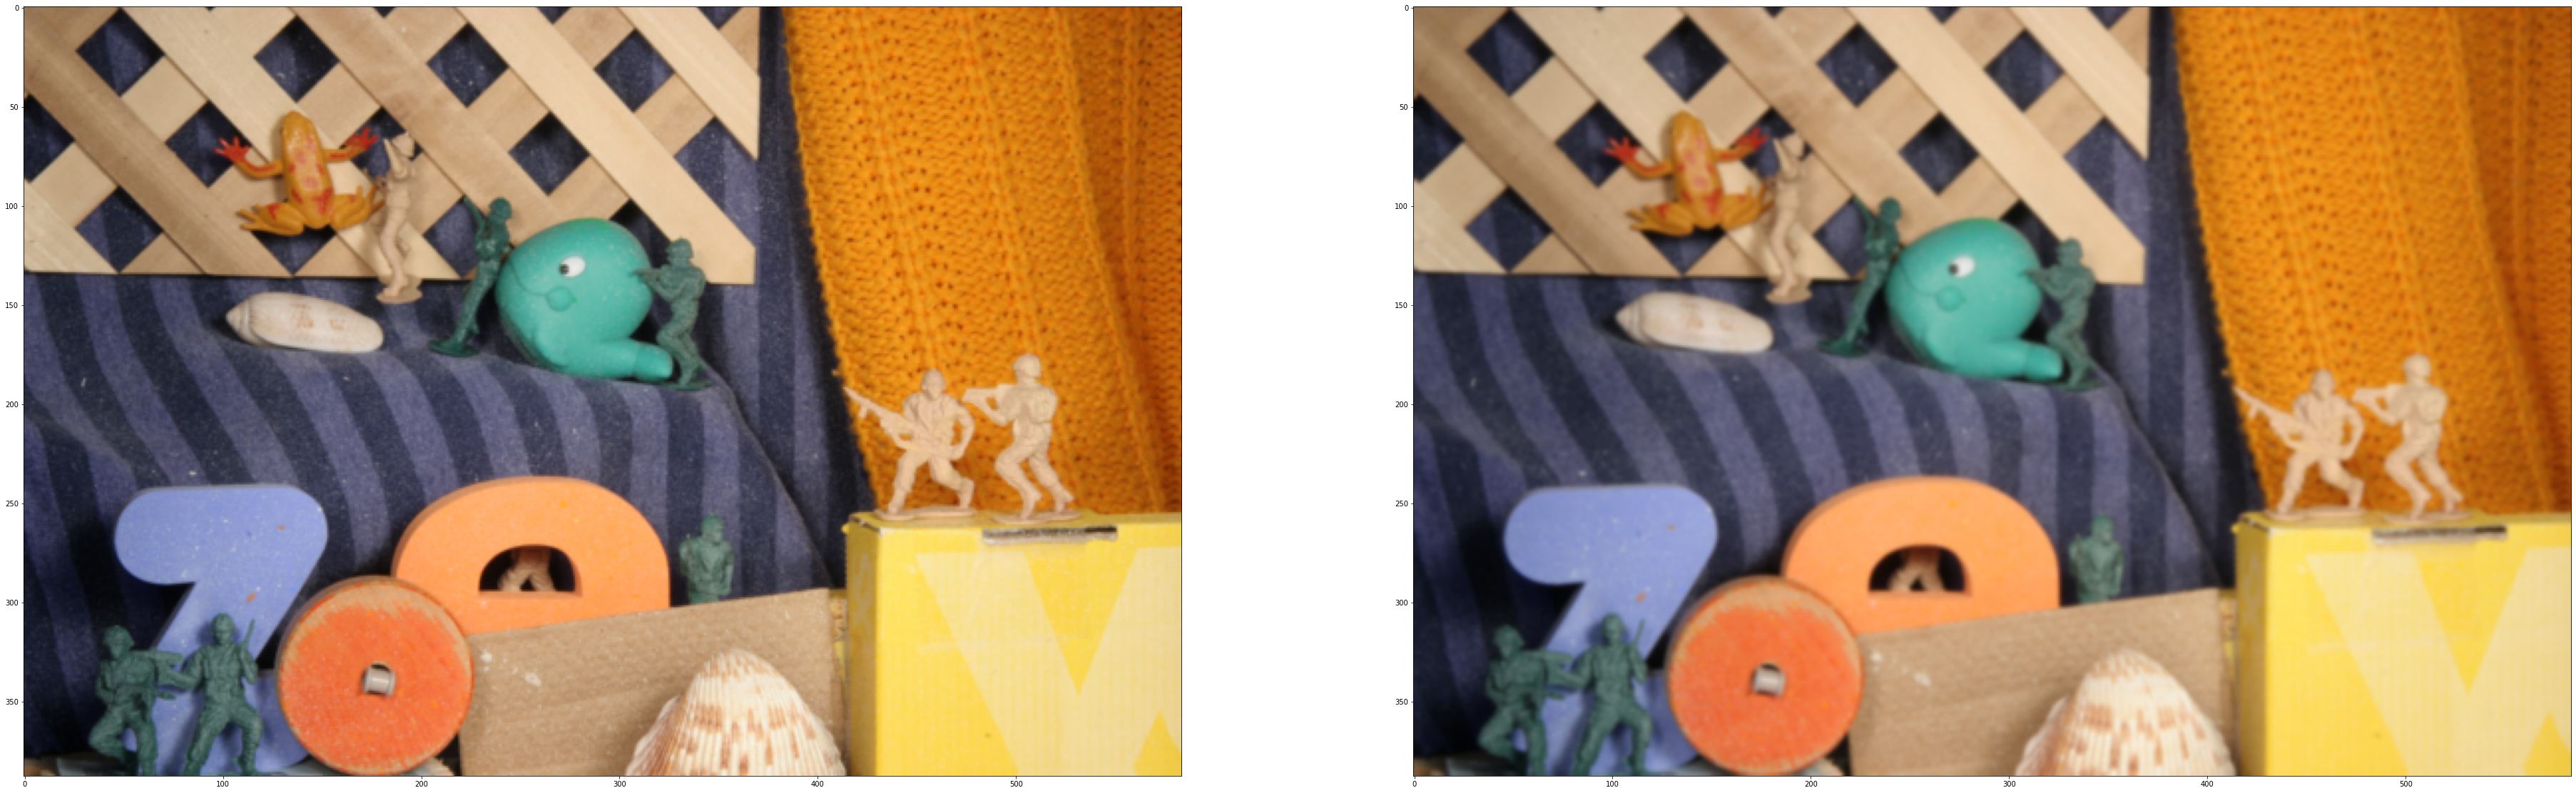

In [4]:
from scipy import misc
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(64,48))
# plt.gray()  # show the filtered result in grayscale

ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

# imga = cv2.imread(r'Other_imgs\cover.jpg')
imga = cv2.imread(r'dataset\eval-data\Army\frame10.png')
ascent = cv2.cvtColor(imga, cv2.COLOR_BGR2RGB)

# ascent = misc.ascent()

print(ascent.shape)
ax1.imshow(ascent)

ascent = np.array(ascent, np.uint8)  # convert img to np.array
blur = cv2.GaussianBlur(src=ascent, ksize=(5,5), sigmaX=gauss_std_dev)  # using opencv (cv2)
ax2.imshow(blur)

plt.show()


# Downscaling and Upscaling

In [6]:
import cv2
import numpy as np

imga = cv2.imread(r'dataset\eval-data\Army\frame10.png')

# Scaling Up the image by a factor of 2
scale_up = 2
# Scaling Down the image by a factor of 2 (multiply by 0.5)
scale_down = 0.5

scaled_f_down = cv2.resize(imga, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)  # Downscaled image with linear interpolation
scaled_f_up = cv2.resize(imga, None, fx= scale_up, fy= scale_up, interpolation= cv2.INTER_CUBIC)  # Upscaled image with bicubic interpolation

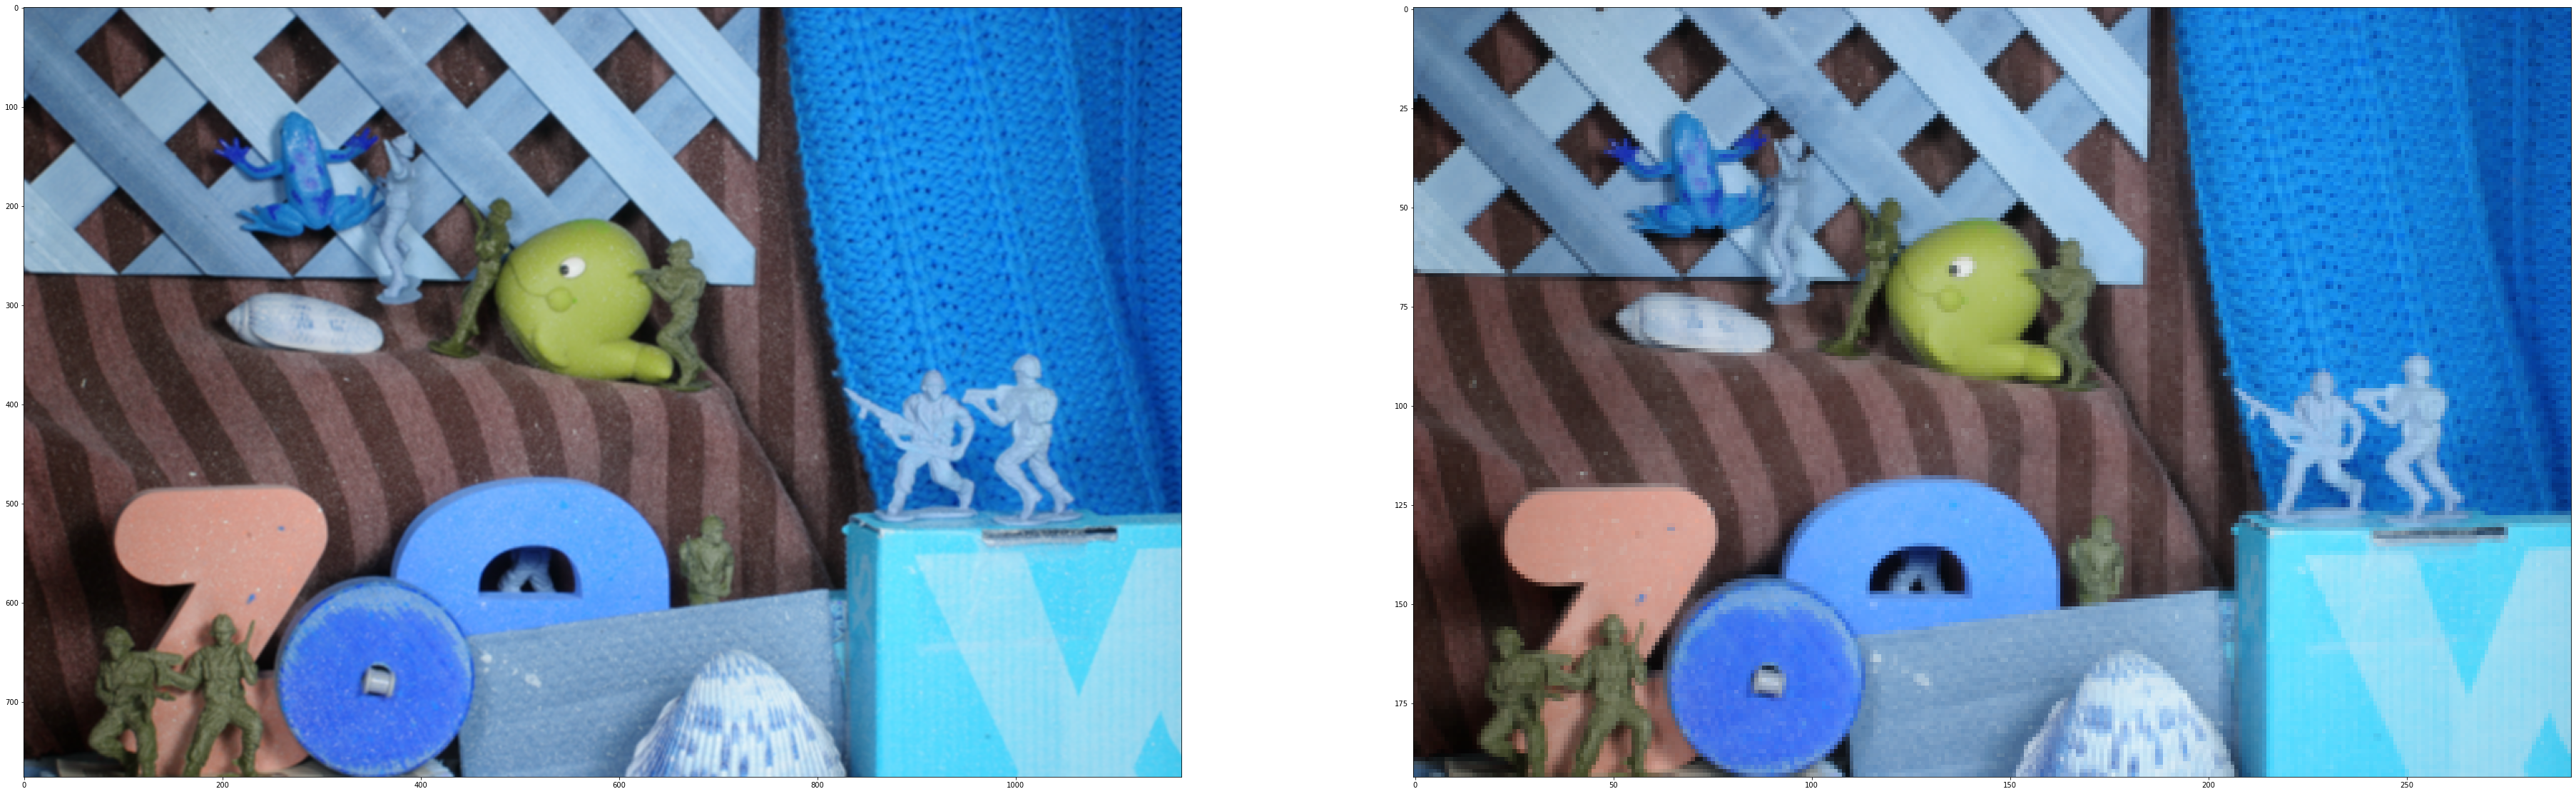

True

In [10]:
fig = plt.figure(figsize=(64,48))
# plt.gray()  # show the filtered result in grayscale

ax1 = fig.add_subplot(121)  # Upscaled image with bicubic interpolation
ax2 = fig.add_subplot(122)  # Downscaled image with linear interpolation

# img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
ax1.imshow(scaled_f_up)
ax2.imshow(scaled_f_down)

plt.show()
cv2.imwrite('test_images/upsc_cv2.png', scaled_f_up)
cv2.imwrite('test_images/dwnsc_cv2.png', scaled_f_down)

# "Pipeline"

In [ ]:
import cv2
from math import sqrt
import numpy as np

# gaussian filter
def gauss_filter(img, tau=0.75):
    # tau -> [0..1] -> typical validated value is 0.75
    gauss_std_dev = sqrt(2/(4*tau))
    
    # plt.gray()  # show the filtered result in grayscale
    
    img_2_lpf = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arr = np.array(img_2_lpf, np.uint8)  # convert img to np.array
    img_gaus = cv2.GaussianBlur(src= img_arr, ksize= (5,5), sigmaX= gauss_std_dev)

    return img_gaus


# downsample 2 times
def downscaling(src_img, scale_factor=0.5):
    dspld_img = cv2.resize(src_img, None, fx= scale_factor, fy= scale_factor, interpolation= cv2.INTER_LINEAR)
    return dspld_img

# apply LK/HS
# def optical_flow(img_t0, img_t1, method):
#     #methods -> HS/LK
#     of_vect = ''
#     return of_vect

# warp the original image 
def warping(img0, of_vect):
    wrpd_img = 'warp', img0
    return wrpd_img

# sum of optical flows
def of_sum(wrpd_of, rest_of):
    sum_of = wrpd_of + rest_of
    return sum_of

# bicubic interpolation (& of upscaling)
def upscaling(wrpd_img, scale_factor=2):
    ups_img = cv2.resize(wrpd_img, None, fx= scale_factor, fy= scale_factor, interpolation= cv2.INTER_CUBIC)
    # sum_of_ups = of_sum('result')
    return ups_img#, sum_of_ups

def median_filter(img, k=3):
    fltrd_wrp = cv2.medianBlur(src= img, ksize= k) # Add median filter to image with a 3x3 kernel
    return fltrd_wrp